In [1]:
!git clone https://github.com/Nehc/gia.git
!pip install -q -r gia/requirements.txt

Cloning into 'gia'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 252 (delta 93), reused 49 (delta 31), pack-reused 107
Receiving objects: 100% (252/252), 311.30 KiB | 2.09 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Filtering content: 100% (3/3), 995.28 MiB | 35.42 MiB/s, done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.2/527.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

chk_points/vqgan_imagenet_f16_1024/configs/model.yaml exists
chk_points/vqgan_imagenet_f16_1024/ckpts/last.ckpt exists
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


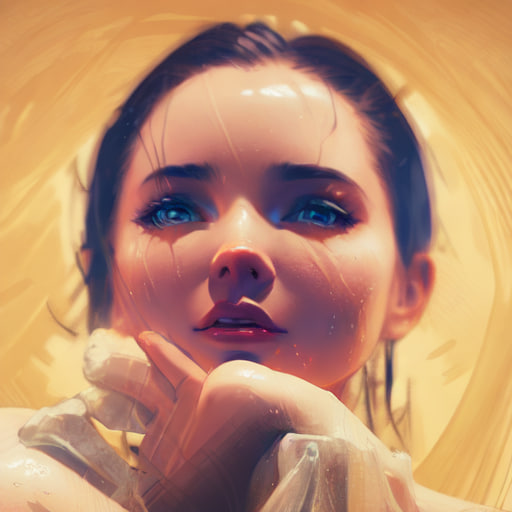

In [ ]:
import torch
from PIL import Image
from gia.vqgan import VQGAN, preprocess_vqgan
import numpy as np

vq_gan = VQGAN()
img = Image.open('photo.jpg').convert("RGB")
x = preprocess_vqgan(np.expand_dims(np.array(img)/255,0))
with torch.no_grad():
  z, _, [_, _, ind] = vq_gan.encode(x)
  b,c,h,w = z.shape # 1, 256, 32, 32
  ind.squeeze_()
img

In [ ]:
x.shape,ind.shape,(b,c,h,w)

(torch.Size([1, 3, 512, 512]), torch.Size([1024]), (1, 256, 32, 32))

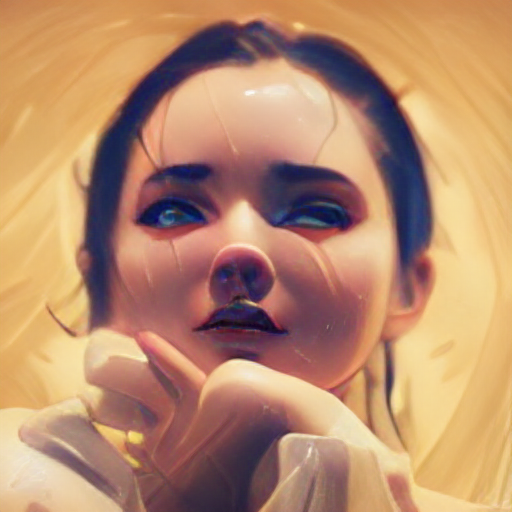

In [ ]:
from gia.vqgan import custom_to_pil

with torch.no_grad():
  nz = vq_gan.quantize.get_codebook_entry(ind, (b,h,w,c))
  rec = vq_gan.decode(nz).detach().cpu()
  rec.squeeze_()

np_img = np.rollaxis(rec.numpy(),0,3)
img = custom_to_pil(np_img)
img